# Guided Capstone Step 6. Documentation

**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   Pre-processing and Training Data Development

5.  Modeling

6.   **Documentation**
  * Review the Results
  * Finalize Code 
  * Finalize Documentation
  * Create a Project Report 
  * Create a Slide Deck for the Executive Audience

In this guided capstone we are going to revisit many of the actions we took in the previous guided capstone steps. This gives you the opportunity to practice the code you wrote to solve the questions in step 4 and 5. 

**<font color='teal'> Start by loading the necessary packages and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [107]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [108]:
os.getcwd()

'/Users/shannonballard/Springboard Guided Capstone'

## Fit Models with Training Dataset

**<font color='teal'> Using sklearn fit the model you chose in Guided Capstone 5 on your training dataset. This includes: creating dummy features for states if you need them, scaling the data,and creating train and test splits before fitting the chosen model.Also, remember to generate a model performance score(MAE, or explained variance) based on the testing hold-out data set.</font>**

In [109]:
df = pd.read_csv('/Users/shannonballard/Springboard Guided Capstone/Step 2/data/step3_output_b.csv')
df.head()

,Name,state,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
0,Alyeska Resort,Alaska,3939,2500,1,0.0,0,2,2,0,...,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0,0
1,Eaglecrest Ski Area,Alaska,2600,1540,0,0.0,0,0,0,0,...,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,0.0,0
2,Hilltop Ski Area,Alaska,2090,294,0,0.0,0,0,0,1,...,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0,0
3,Arizona Snowbowl,Arizona,11500,2300,0,0.0,1,0,2,2,...,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,0.0,1
4,Sunrise Park Resort,Arizona,11100,1800,0,0.0,0,1,2,3,...,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0,1


In [110]:
# Drop 'state' column
df3 = df.drop('state', 1)
df3.head()

,Name,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
0,Alyeska Resort,3939,2500,1,0.0,0,2,2,0,0,...,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0,0
1,Eaglecrest Ski Area,2600,1540,0,0.0,0,0,0,0,4,...,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,0.0,0
2,Hilltop Ski Area,2090,294,0,0.0,0,0,0,1,0,...,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0,0
3,Arizona Snowbowl,11500,2300,0,0.0,1,0,2,2,1,...,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,0.0,1
4,Sunrise Park Resort,11100,1800,0,0.0,0,1,2,3,1,...,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0,1


In [111]:
# first we import the preprocessing package from the sklearn library
from sklearn import preprocessing

# Declare an explanatory variable, called X,and assign it the result of dropping 'Name' and 'AdultWeekend' from the df
X2 = df3.drop(['Name','AdultWeekend'], axis=1)

# Declare a response variable, called y, and assign it the AdultWeekend column of the df 
 
y2 = df3['AdultWeekend']

# Here we use the StandardScaler() method of the preprocessing package, and then call the fit() method with parameter X 
scaler = preprocessing.StandardScaler().fit(X2)

# Declare a variable called X_scaled, and assign it the result of calling the transform() method with parameter X 
X2_scaled=scaler.transform(X2) 

In [112]:
# Import the train_test_split function from the sklearn.model_selection utility.  
from sklearn.model_selection import train_test_split

# Get the 1-dimensional flattened array of our response variable y by calling the ravel() function on y
y2 = y2.ravel()

# Call the train_test_split() function with the first two parameters set to X2_scaled and y 
# Declare four variables, X_train, X_test, y_train and y_test separated by commas 
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_scaled, y2, test_size=0.25, random_state=1)

In [138]:
#all second model set
from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error
lm2 = linear_model.LinearRegression()
model = lm.fit(X2_train,y2_train)

In [139]:
# Make a variable called y_pred and assign it the result of calling predict() on our model variable with parameter X2_test
y2_pred = model.predict(X2_test)

In [140]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error

explained_variance_score(y2_test, y2_pred)

0.934761019889277

In [141]:
mean_absolute_error(y2_test, y2_pred)

5.126071445374538

In [142]:
print(lm.intercept_)

64.09509138559456


In [143]:
# You might want to make a pandas DataFrame displaying the coefficients for each state like so: 
# pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient'])
coeff = pd.DataFrame(abs(lm.coef_), X2.columns, columns=['Coefficient'])
coeff.head()

,Coefficient
summit_elev,4.652246
vertical_drop,1.022142
trams,0.127082
fastEight,0.224541
fastSixes,0.280156


In [119]:
sort = coeff.sort_values(['Coefficient'], ascending=[False])
top_ten = sort.head(10)
print(top_ten)

                 Coefficient
AdultWeekday       19.841663
clusters            5.969742
summit_elev         4.652246
Runs                1.929555
surface             1.435298
triple              1.377548
averageSnowfall     1.081889
quad                1.074501
vertical_drop       1.022142
fastQuads           0.978870


#### Best Model 

Model 2

## Review the results 

**<font color='teal'> Now, let's predict the Big Mountain Weekend price with our model in order to provide a recommendation to our managers on how to price the `AdultWeekend` lift ticket. First we need to find the row for Big Mountain resort in our data using string contains or string matching.</font>**

In [120]:
#Note that 'Big Mountain' is not in df. Big Mountain changed its name in 2007 to 'Whitefish', so will use that instead
ac = df3[df3['Name'].str.contains('Whitefish')]
ac

,Name,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
151,Whitefish Mountain Resort,6817,2353,0,0.0,0,3,2,6,0,...,3000.0,600.0,123.0,72.0,333.0,81.0,81.0,123.0,600.0,1


**<font color='teal'> Prepare the Big Mountain resort data row as you did in the model fitting stage.</font>**

In [121]:
X2b = ac.drop(['Name','AdultWeekend'], axis=1)

In [122]:
X2b.head()

,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,projectedDaysOpen,NightSkiing_ac,clusters
151,6817,2353,0,0.0,0,3,2,6,0,3,...,3.3,3000.0,600.0,123.0,72.0,333.0,81.0,123.0,600.0,1


In [123]:
scaler2 = preprocessing.StandardScaler().fit(X2b)

In [124]:
X2b_scaled=scaler.transform(X2b)

**<font color='teal'> Predict the Big Mountain resort `Adult Weekend` price and print it out.</font>** This is our expected price to present to management. Based on our model given the characteristics of the resort in comparison to other ski resorts and their unique characteristics.

In [125]:
whitefish_pred = model.predict(X2b_scaled)

In [126]:
print ("The predicted adult weekend price is $%s " % ' '.join(map(str, whitefish_pred)))

The predicted adult weekend price is $86.59476215611346 


**<font color='teal'> Print the Big Mountain resort actual `Adult Weekend` price.</font>**

In [127]:
print ("The actual adult weekend price is $%s " % ' '.join(map(str, ac.AdultWeekend)))

The actual adult weekend price is $81.0 


**<font color='teal'> As part of reviewing the results it is an important step to generate figures to visualize the data story. We can use the clusters we added to our data frame to create scatter plots for visualizing the Adult Weekend values compared to other characteristics. Run the example below to get you started and build two or three more figures to include in your data story telling.</font>**

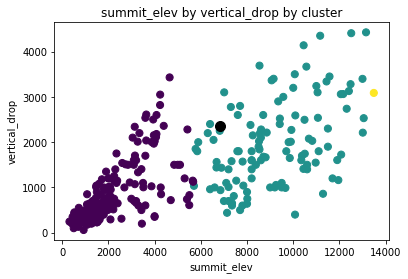

In [128]:
plt.scatter(df3['summit_elev'], df3['vertical_drop'], c=df3['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(ac['summit_elev'], ac['vertical_drop'], c='black', s=100)
plt.xlabel('summit_elev')
plt.ylabel('vertical_drop')
plt.title('summit_elev by vertical_drop by cluster')
plt.savefig('/Users/shannonballard/Springboard Guided Capstone/Step 2/figures/fig1.png',bbox_inches='tight')

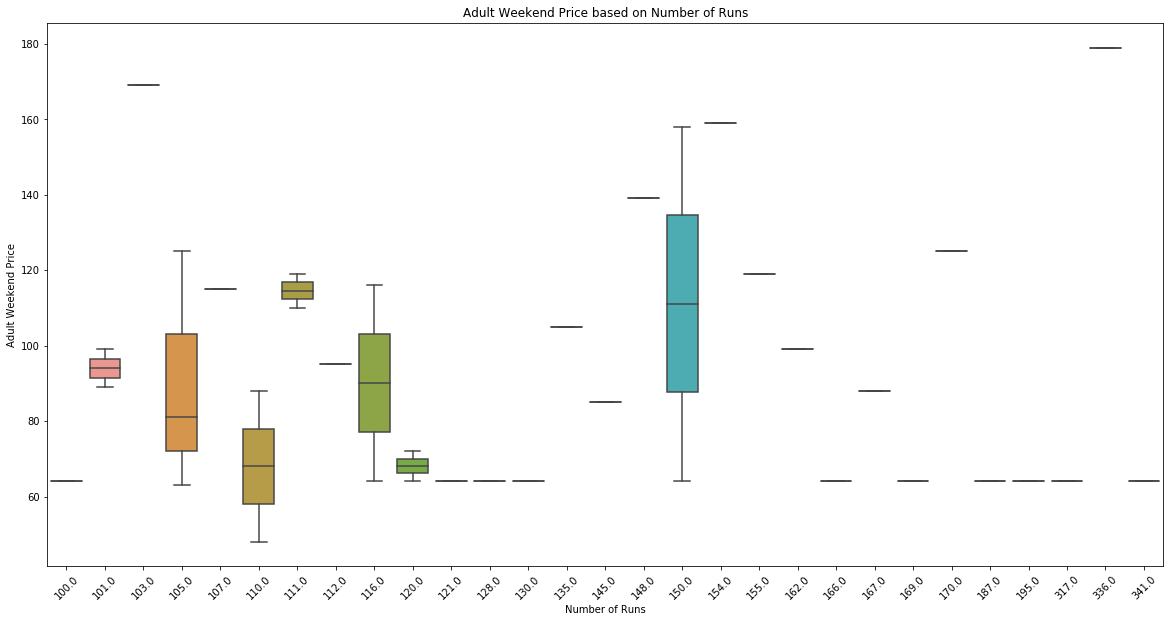

In [129]:
#For resorts with at least 100 runs, what is the average Adult Weekend ticket price?
plt.figure(figsize=(20,10))
sns.boxplot(x='Runs', y='AdultWeekend',data=df[(df['Runs']>=100)], whis=10)
plt.xlabel('Number of Runs')
plt.ylabel('Adult Weekend Price')
plt.title('Adult Weekend Price based on Number of Runs')
plt.xticks(rotation=45)
plt.savefig('/Users/shannonballard/Springboard Guided Capstone/Step 2/figures/fig2.png',bbox_inches='tight')

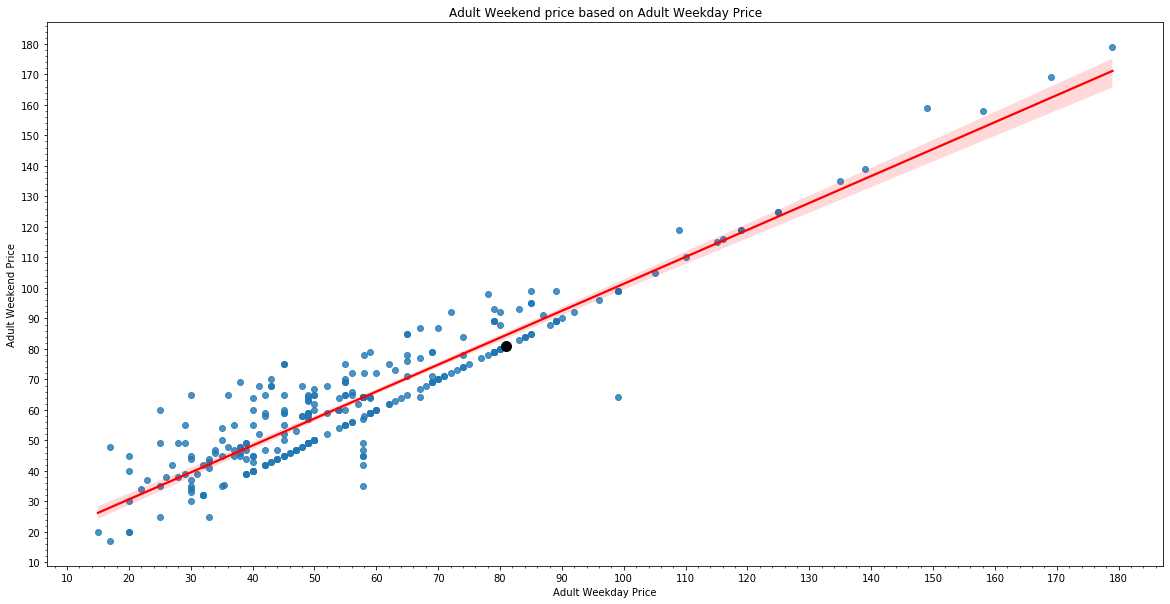

In [130]:
#What is the relationship between Weekend Ticket Price and Weekday Ticket Price?

from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

plt.figure(figsize=(20,10))
ax = sns.regplot(df3['AdultWeekday'], df3['AdultWeekend'], data=df3, line_kws={"color": "red"})
plt.scatter(ac['AdultWeekday'], ac['AdultWeekend'], c='black', s=100)
plt.xlabel('Adult Weekday Price')
plt.ylabel('Adult Weekend Price')
plt.title('Adult Weekend price based on Adult Weekday Price')

# Change major ticks to show every 10 
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_major_locator(MultipleLocator(10))

# Change minor ticks to show every 2 (10/2 =5)
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))

plt.savefig('/Users/shannonballard/Springboard Guided Capstone/Step 2/figures/fig3.png',bbox_inches='tight')

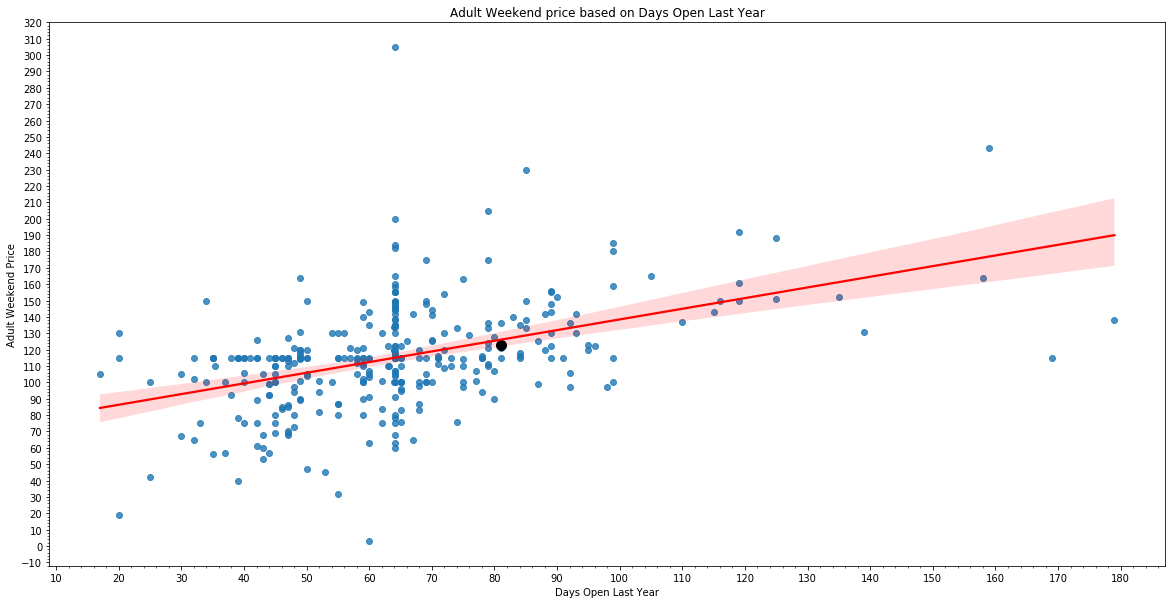

In [131]:
#What is the relationship between Weekend Ticket Price and Days Open Last Year?
plt.figure(figsize=(20,10))
ax = sns.regplot(df3['AdultWeekend'], df3['daysOpenLastYear'], data=df3, line_kws={"color": "red"})
plt.scatter(ac['AdultWeekend'], ac['daysOpenLastYear'], c='black', s=100)
plt.xlabel('Days Open Last Year')
plt.ylabel('Adult Weekend Price')
plt.title('Adult Weekend price based on Days Open Last Year')

# Change major ticks to show every 10 
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_major_locator(MultipleLocator(10))

# Change minor ticks to show every 2 (10/2 =5)
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))

plt.savefig('/Users/shannonballard/Springboard Guided Capstone/Step 2/figures/fig4.png',bbox_inches='tight')

## Finalize Code

 Making sure our code is well organized and easy to follow is an important step. This is the time where you need to review the notebooks and Python scripts you've created and clean them up so they are easy to follow and succinct in nature. Addtionally, we will also save our final model as a callable object using Pickle for future use in a data pipeline. Pickle is a module that serializes (and de-serializes) Python objects so that they can become executable objects like functions. It's used extensively in production environments where machine learning models are deployed on an industrial scale!**<font color='teal'> Run the example code below to save out your callable model. Notice that we save it in the models folder we created in our previous guided capstone step.</font>** 

In [132]:
import pickle
s = pickle.dumps(model)
from joblib import dump, load
dump(model, '/Users/shannonballard/Springboard Guided Capstone/Step 2/models/regression_model_adultweekend.joblib')

['/Users/shannonballard/Springboard Guided Capstone/Step 2/models/regression_model_adultweekend.joblib']

## Finalize Documentation

For model documentation, we want to save the model performance metrics as well as the features included in the final model. You could also save the model perfomance metrics and coefficients fo the other models you tried in case you want to refer to them later. **<font color='teal'> Create a dataframe containing the coefficients and the model performance metrics and save it out as a csv file, then upload it to your github repository.</font>** 

In [133]:
df = pd.read_csv('/Users/shannonballard/Springboard Guided Capstone/Step 2/data/step3_output_b.csv')
df.head()

,Name,state,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
0,Alyeska Resort,Alaska,3939,2500,1,0.0,0,2,2,0,...,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0,0
1,Eaglecrest Ski Area,Alaska,2600,1540,0,0.0,0,0,0,0,...,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,0.0,0
2,Hilltop Ski Area,Alaska,2090,294,0,0.0,0,0,0,1,...,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0,0
3,Arizona Snowbowl,Arizona,11500,2300,0,0.0,1,0,2,2,...,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,0.0,1
4,Sunrise Park Resort,Arizona,11100,1800,0,0.0,0,1,2,3,...,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0,1


In [159]:
coeff2 = pd.DataFrame(abs(lm.coef_), X2.columns, columns=['Model_2_Coefficient'])

In [160]:
coeff2['Model_2_explained_var'] = explained_variance_score(y2_test, y2_pred)
coeff2['Model_2_mean_abs_err'] = mean_absolute_error(y2_test, y2_pred)

In [172]:
coeff2.to_csv('/Users/shannonballard/Springboard Guided Capstone/Step 2/models/model2_metrics.csv',index=False)

In [163]:
#Model 1
df_state = df['state']
dummies = pd.get_dummies(df_state)
df2 = pd.concat([df, dummies], axis=1)
df2 = df2.drop('state', 1)


In [164]:
X = df2.drop(['Name','AdultWeekend'], axis=1)

# Declare a response variable, called y, and assign it the AdultWeekend column of the df 
 
y = df2['AdultWeekend']

# Here we use the StandardScaler() method of the preprocessing package, and then call the fit() method with parameter X 
scaler = preprocessing.StandardScaler().fit(X)

# Declare a variable called X_scaled, and assign it the result of calling the transform() method with parameter X 
X_scaled=scaler.transform(X) 

y = y.ravel()

# Call the train_test_split() function with the first two parameters set to X_scaled and y 
# Declare four variables, X_train, X_test, y_train and y_test separated by commas 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

lm1 = linear_model.LinearRegression()
model1 = lm.fit(X_train,y_train)

y_pred = model1.predict(X_test)

In [165]:
coeff1 = pd.DataFrame(abs(lm.coef_), X.columns, columns=['Model_1_Coefficient'])

In [166]:
coeff1['Model_1_explained_var'] = explained_variance_score(y_test, y_pred)
coeff1['Model_1_mean_abs_err'] = mean_absolute_error(y_test, y_pred)

In [167]:
#Model 3
# Drop 'summit_elev' column
df4 = df3.drop('summit_elev', 1)

# Declare an explanatory variable, called X3,and assign it the result of dropping 'Name' and 'AdultWeekend' from the df
X3 = df4.drop(['Name','AdultWeekend'], axis=1)

# Declare a response variable, called y3, and assign it the AdultWeekend column of the df4 
 
y3 = df4['AdultWeekend']

# Here we use the StandardScaler() method of the preprocessing package, and then call the fit() method with parameter X3 
scaler3 = preprocessing.StandardScaler().fit(X3)

# Declare a variable called X3_scaled, and assign it the result of calling the transform() method with parameter X3 
X3_scaled=scaler3.transform(X3) 

y3 = y3.ravel()

# Call the train_test_split() function with the first two parameters set to X3_scaled and y3 
# Declare four variables, X3_train, X3_test, y3_train and y3_test separated by commas 
X3_train, X3_test, y3_train, y3_test = train_test_split(X3_scaled, y3, test_size=0.25, random_state=1)

#all third model set
lm3 = linear_model.LinearRegression()
model3 = lm.fit(X3_train,y3_train)

# Make a variable called y3_pred and assign it the result of calling predict() on our model variable with parameter X3_test
y3_pred = model.predict(X3_test)


In [169]:
coeff3 = pd.DataFrame(abs(lm.coef_), X3.columns, columns=['Model_3_Coefficient'])

In [170]:
coeff3['Model_3_Coefficient'] = coeff1
coeff3['Model_3_explained_var'] = explained_variance_score(y3_test, y3_pred)
coeff3['Model_3_mean_abs_err'] = mean_absolute_error(y3_test, y3_pred)

In [171]:
coeff_df = pd.concat([coeff2, coeff1, coeff3])

coeff_df.to_csv('/Users/shannonballard/Springboard Guided Capstone/Step 2/models/model_metrics.csv',index=False)